##IMPORT DATA

In [1]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report, confusion_matrix, roc_auc_score
from sklearn.utils import resample
from sklearn.preprocessing import LabelEncoder
import numpy as np

In [4]:
dftrain = pd.read_csv('/content/drive/MyDrive/Kompetisi/Find It/dataset/train.csv')
dftarget = pd.read_csv('/content/drive/MyDrive/Kompetisi/Find It/dataset/target.csv')

dftrain = pd.concat([dftrain, dftarget], axis=1)

dftest = pd.read_csv('/content/drive/MyDrive/Kompetisi/Find It/dataset/test.csv')

##PREPOCESSING DATA

In [5]:
print("======SAMPEL DATA=====")
print(dftrain.head())
print("\n======INFO DATA=====")
print(dftrain.info())
print("\n======STATISTIK DESKRIPTIF=====")
print(dftrain.describe())
print("\n======MISSING VALUES=====")
print(dftrain.isnull().sum())
print("\n======DUPLICATE DATA=====")
print(dftrain.duplicated().sum())

======SAMPEL DATA=====
                  developerCountry countryCode  userRatingCount  \
0                           NORWAY          RO           127731   
1  ADDRESS NOT LISTED IN PLAYSTORE      GLOBAL                0   
2             UNITED ARAB EMIRATES          CZ            51143   
3                          GERMANY      GLOBAL             1074   
4          CANNOT IDENTIFY COUNTRY      GLOBAL               17   

  primaryGenreName             downloads  deviceType hasPrivacyLink  \
0           Sports                   NaN  smartphone           True   
1          Medical              50 - 100      GLOBAL           True   
2            Games  50000000 - 100000000      GLOBAL           True   
3            Games                   NaN      GLOBAL           True   
4            Tools           1000 - 5000      GLOBAL           True   

  hasTermsOfServiceLink hasTermsOfServiceLinkRating  isCorporateEmailScore  \
0                  True                         low                  

In [6]:
print("\n======MISSING VALUES=====")
print(dftest.isnull().sum())
print("\n======DUPLICATE DATA=====")
print(dftest.duplicated().sum())


======MISSING VALUES=====
ID                                    0
developerCountry                      0
countryCode                          29
userRatingCount                       0
primaryGenreName                      0
downloads                           881
deviceType                            0
hasPrivacyLink                      316
hasTermsOfServiceLink              1961
hasTermsOfServiceLinkRating        1961
isCorporateEmailScore               440
adSpent                            2426
appAge                               17
averageUserRating                   514
appContentBrandSafetyRating        2671
appDescriptionBrandSafetyRating       0
mfaRating                             0
dtype: int64

======DUPLICATE DATA=====
0


In [7]:
dftrain.head()

developerCountry countryCode  userRatingCount  \
0                           NORWAY          RO           127731   
1  ADDRESS NOT LISTED IN PLAYSTORE      GLOBAL                0   
2             UNITED ARAB EMIRATES          CZ            51143   
3                          GERMANY      GLOBAL             1074   
4          CANNOT IDENTIFY COUNTRY      GLOBAL               17   

  primaryGenreName             downloads  deviceType hasPrivacyLink  \
0           Sports                   NaN  smartphone           True   
1          Medical              50 - 100      GLOBAL           True   
2            Games  50000000 - 100000000      GLOBAL           True   
3            Games                   NaN      GLOBAL           True   
4            Tools           1000 - 5000      GLOBAL           True   

  hasTermsOfServiceLink hasTermsOfServiceLinkRating  isCorporateEmailScore  \
0                  True                         low                   99.0   
1                   NaN                         NaN                   99.0   
2                  True                         low                    0.0   
3                   NaN                         NaN                   99.0   
4                   NaN                         NaN                   99.0   

     adSpent      appAge  averageUserRating appContentBrandSafetyRating  \
0  14.017220  160.400000                4.0                      medium   
1        NaN   17.500000                0.0                         NaN   
2  31.883163   30.766667                4.0                         NaN   
3        NaN   71.533333                4.0                         NaN   
4        NaN   52.400000                4.0                         NaN   

  appDescriptionBrandSafetyRating mfaRating  coppaRisk  
0                             low       low      False  
1                             low       low      False  
2                             low       low      False  
3                             low       low      False  
4                             low       low      False

In [8]:
# Daftar kategori yang akan dihapus
to_drop = [
    '10000000000 - 15000000000',
    '1000000000 - 5000000000',
    '500000000 - 1000000000',
    '500 - 1',
    '50 - 1'
]

# Hapus baris dengan kategori yang tidak valid
dftrain = dftrain[~dftrain['downloads'].isin(to_drop)]

# Ganti '5 - 1' dan '1 - 1' dengan '1 - 5'
dftrain['downloads'] = dftrain['downloads'].replace({
    '5 - 1': '1 - 5',
    '1 - 1': '1 - 5',
    '10 - 1': '5 - 10'
})

<ipython-input-8-a176cc00df8c>:14: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  dftrain['downloads'] = dftrain['downloads'].replace({


In [10]:
dftrain['developerCountry'].value_counts()

developerCountry
ADDRESS NOT LISTED IN PLAYSTORE                                               4338
CANNOT IDENTIFY COUNTRY                                                        768
UNITED STATES                                                                  322
CHINA                                                                          149
INDIA                                                                          131
REPUBLIC OF KOREA                                                               94
FRANCE                                                                          86
HONG KONG                                                                       85
UNITED KINGDOM                                                                  59
CYPRUS                                                                          58
RUSSIAN FEDERATION                                                              52
TURKEY                                                                          48
PAKISTAN                                                                        47
VIET NAM                                                                        46
JAPAN                                                                           44
SINGAPORE                                                                       42
UNITED ARAB EMIRATES                                                            39
GERMANY                                                                         35
CANADA                                                                          30
ISRAEL                                                                          30
INDONESIA                                                                       30
SPAIN                                                                           22
JORDAN                                                                          21
AUSTRALIA                                                                       20
BANGLADESH                                                                      19
NETHERLANDS                                                                     16
SWITZERLAND                                                                     16
ITALY                                                                           15
THAILAND                                                                        15
SWEDEN                                                                          13
ICELAND                                                                         13
UKRAINE                                                                         13
MALAYSIA                                                                        12
POLAND                                                                          12
CZECH REPUBLIC                                                                  12
ROMANIA                                                                         10
ARGENTINA                                                                        9
AUSTRIA                                                                          8
PERU                                                                             8
IRELAND                                                                          8
BULGARIA                                                                         8
FINLAND                                                                          7
EGYPT                                                                            7
PHILIPPINES                                                                      7
NIGER                                                                            7
GEORGIA                                                                          7
DENMARK                                                                          7
BRAZIL                                                                           7

In [11]:
# Ganti nilai-nilai noise dengan 'UNKNOWN'
dftrain['developerCountry'] = dftrain['developerCountry'].replace({
    'ADDRESS NOT LISTED IN PLAYSTORE': 'UNKNOWN',
    'CANNOT IDENTIFY COUNTRY': 'UNKNOWN',
    'PERSONAL DATA, CAN NOT BE PUBLICLY DISCLOSED ACCORDING TO APPLICABLE LAWS.': 'UNKNOWN',
    'STATUTORY MASKING ENABLED': 'UNKNOWN'
})

# Sesuaikan format negara yang terlalu panjang atau tidak konsisten
dftrain['developerCountry'] = dftrain['developerCountry'].replace({
    'TAIWAN, PROVINCE OF CHINA': 'CHINA'
})

# # Gabungkan negara dengan count <= 5 menjadi 'RARE' atau 'OTHERS'
# rare_countries = dftrain['developerCountry'].value_counts()[dftrain['developerCountry'].value_counts() <= 5].index
# dftrain['developerCountry'] = dftrain['developerCountry'].replace(rare_countries, 'RARE')

<ipython-input-11-8b8d277e1eef>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  dftrain['developerCountry'] = dftrain['developerCountry'].replace({
<ipython-input-11-8b8d277e1eef>:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  dftrain['developerCountry'] = dftrain['developerCountry'].replace({


In [12]:
def handle_missing_values(df):
    # Kategorikal: Ganti dengan 'Unknown' atau 'False' jika relevan

    # Numerik: Ganti dengan 0, median, atau mean
    df['isCorporateEmailScore'] = df['isCorporateEmailScore'].fillna(0)
    df['adSpent'] = df['adSpent'].fillna(0)
    df['appAge'] = df['appAge'].fillna(df['appAge'].fillna(0))
    df['averageUserRating'] = df['averageUserRating'].fillna(df['averageUserRating'].fillna(0))

    # Opsional: Hapus duplikat
    df.drop_duplicates(inplace=True)

    return df

dftrain = handle_missing_values(dftrain)

<ipython-input-12-87b45243858b>:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['isCorporateEmailScore'] = df['isCorporateEmailScore'].fillna(0)
<ipython-input-12-87b45243858b>:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['adSpent'] = df['adSpent'].fillna(0)
<ipython-input-12-87b45243858b>:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydat

In [13]:
import pandas as pd
import numpy as np

def process_downloads(df, column_name='downloads'):
    """
    Proses kolom downloads dan mengembalikan 2 kolom baru:
    - downloads_min: angka awal dari rentang downloads
    - kategori_download: klasifikasi jumlah download
    - coppa_risk: level risiko COPPA
    """
    df = df.copy()  # biar nggak ubah dataframe asli

    # Ekstrak angka pertama dari rentang
    df['downloads_min'] = df[column_name].str.extract(r'(\d+)')
    df['downloads_min'] = pd.to_numeric(df['downloads_min'], errors='coerce')  # jadi NaN kalau gagal

    # Fungsi kategorisasi
    def categorize_downloads(n):
        if pd.isna(n):
            return 5
        elif n < 100:
            return 3
        elif n < 1000:
            return 2
        elif n < 100000:
            return 1
        else:
            return 5

    # Terapkan fungsi
    df['kategori_download'] = df['downloads_min'].apply(categorize_downloads)

    return df

dftrain = process_downloads(dftrain)

In [14]:
dftrain['downloads_min'] = dftrain['downloads_min'].fillna(0)

In [15]:
import numpy as np
import pandas as pd

def feature_engineering(df):
    df = df.copy()

    # Fill missing values for boolean operations
    df['hasPrivacyLink'] = df['hasPrivacyLink'].fillna(False).astype(bool)
    df['hasTermsOfServiceLink'] = df['hasTermsOfServiceLink'].fillna(False).astype(bool)

    # 1. Log Transformations
    df['userRatingCountLog'] = np.log1p(df['userRatingCount'])
    df['adSpentLog'] = np.log1p(df['adSpent'])

    # 2. Age and Ratios
    df['appAgeYears'] = df['appAge'] / 365

    # 3. Legal Link Features
    df['hasBothLinks'] = (df['hasPrivacyLink'] & df['hasTermsOfServiceLink']).astype(int)
    df['missingLegalLinks'] = ((~df['hasPrivacyLink']) & (~df['hasTermsOfServiceLink'])).astype(int)

    # 4. Developer Country Info
    df['isDeveloperCountryUnknown'] = df['developerCountry'].isin([
        'ADDRESS NOT LISTED IN PLAYSTORE', 'CANNOT IDENTIFY COUNTRY'
    ]).astype(int)

    # 5. Target Market
    df['isTargetingGlobal'] = (df['countryCode'] == 'GLOBAL').astype(int)

    # 6. Genre Risk Level
    high_risk_genres = ['Games', 'Entertainment', 'Social', 'Video Players']
    df['genreRiskLevel'] = df['primaryGenreName'].apply(lambda x: 'high' if x in high_risk_genres else 'low')
    df['genreRiskLevelEncoded'] = df['genreRiskLevel'].map({'low': 0, 'high': 1})

    # 7. Device Type Flag
    df['isForKidsDevices'] = df['deviceType'].apply(
        lambda x: int(isinstance(x, str) and ('tablet' in x or 'connected-tv' in x))
    )

    # 8. Corporate Score Flag
    df['isLikelyCorporate'] = (df['isCorporateEmailScore'] > 70).astype(int)

    # 9. Brand Safety Combination
    df['contentSafetyCombo'] = df['appContentBrandSafetyRating'].astype(str) + '_' + df['appDescriptionBrandSafetyRating'].astype(str)
    le = LabelEncoder()
    df['contentSafetyComboEncoded'] = le.fit_transform(df['contentSafetyCombo'])

    # 11. Feature Interactions
    df['highRatingNoPrivacyLink'] = ((df['averageUserRating'] >= 4.0) & (~df['hasPrivacyLink'])).astype(int)
    df['highRiskAndForKids'] = ((df['genreRiskLevelEncoded'] == 1) & (df['isForKidsDevices'] == 1)).astype(int)

    # 12. Replace infinite values with -1
    df.replace([np.inf, -np.inf], -1, inplace=True)

    return df

dftrain = feature_engineering(dftrain)

<ipython-input-15-36ed7d011028>:8: FutureWarning: Downcasting object dtype arrays on .fillna, .ffill, .bfill is deprecated and will change in a future version. Call result.infer_objects(copy=False) instead. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  df['hasPrivacyLink'] = df['hasPrivacyLink'].fillna(False).astype(bool)
<ipython-input-15-36ed7d011028>:9: FutureWarning: Downcasting object dtype arrays on .fillna, .ffill, .bfill is deprecated and will change in a future version. Call result.infer_objects(copy=False) instead. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  df['hasTermsOfServiceLink'] = df['hasTermsOfServiceLink'].fillna(False).astype(bool)


In [16]:
print("\n======MISSING VALUES=====")
print(dftrain.isnull().sum())
print("\n======DUPLICATE DATA=====")
print(dftrain.duplicated().sum())


======MISSING VALUES=====
developerCountry                      0
countryCode                          64
userRatingCount                       0
primaryGenreName                      0
downloads                          2146
deviceType                            0
hasPrivacyLink                        0
hasTermsOfServiceLink                 0
hasTermsOfServiceLinkRating        4628
isCorporateEmailScore                 0
adSpent                               0
appAge                                0
averageUserRating                     0
appContentBrandSafetyRating        6155
appDescriptionBrandSafetyRating       0
mfaRating                             0
coppaRisk                             0
downloads_min                         0
kategori_download                     0
userRatingCountLog                    0
adSpentLog                            0
appAgeYears                           0
hasBothLinks                          0
missingLegalLinks                     0
isDeveloperCo

In [17]:
label_cols = ['developerCountry', 'countryCode', 'primaryGenreName', 'downloads', 'deviceType',
              'hasPrivacyLink', 'hasTermsOfServiceLink', 'hasTermsOfServiceLinkRating',
              'appContentBrandSafetyRating', 'appDescriptionBrandSafetyRating', 'mfaRating','contentSafetyCombo','genreRiskLevel']

# Konversi ke string dulu
for col in label_cols:
    dftrain[col] = dftrain[col].astype(str)

# Lalu encoding
le = LabelEncoder()
for col in label_cols:
    dftrain[col] = le.fit_transform(dftrain[col])

In [18]:
categorical_cols = [
    'developerCountry',           # masih kategorikal
    'countryCode',                # masih kategorikal
    'primaryGenreName',           # masih kategorikal
    'deviceType',                 # masih kategorikal
    'appContentBrandSafetyRating',# masih kategorikal
    'appDescriptionBrandSafetyRating', # masih kategorikal
    'contentSafetyCombo',         # gabungan dua kolom, masih string
    'genreRiskLevel'              # 'high' atau 'low', masih kategorikal
]


numerical_cols = [
    'userRatingCountLog',         # hasil log transform
    'adSpentLog',                 # hasil log transform
    'appAgeYears',                # konversi umur ke tahun
    'averageUserRating',
    'isCorporateEmailScore'
]

engineered_binary_cols = [
    'hasPrivacyLink',
    'hasTermsOfServiceLink',
    'hasBothLinks',
    'missingLegalLinks',
    'isDeveloperCountryUnknown',
    'isTargetingGlobal',
    'isForKidsDevices',
    'isLikelyCorporate',
    'highRatingNoPrivacyLink',
    'highRiskAndForKids',
    'genreRiskLevelEncoded',
    'contentSafetyComboEncoded'
]



In [ ]:
from sklearn.model_selection import train_test_split
from imblearn.over_sampling import SMOTENC

# Gunakan hanya fitur yang akan dipakai untuk training
feature_cols = categorical_cols + numerical_cols + engineered_binary_cols
X = dftrain[feature_cols]
y = dftrain['coppaRisk']

# Asumsikan X adalah fitur dan y adalah target
X_train, X_test, y_train, y_test = train_test_split(
    X, y,
    test_size=0.2,         # 20% data untuk testing
    random_state=42,       # agar hasil konsisten
    stratify=y             # menjaga distribusi kelas
)

## MODELING

In [21]:
from xgboost import XGBClassifier
from sklearn.calibration import CalibratedClassifierCV
from sklearn.metrics import roc_auc_score, classification_report

xgb = XGBClassifier(
    n_estimators=1000,                 # lebih banyak estimator, karena learning_rate kecil
    learning_rate=0.005,               # perkuat fokus pada pembelajaran bertahap
    max_depth=5,                       # kurangi kedalaman pohon untuk menghindari overfitting mayoritas
    min_child_weight=1,               # kurangi batas minimum untuk membuat split (lebih sensitif ke minoritas)
    gamma=0,                          # hilangkan batas split agar model lebih bebas eksplorasi
    subsample=1,                    # turunkan untuk meningkatkan variasi pohon
    colsample_bytree=0.7,             # turunkan untuk membuat model lebih robust
    reg_lambda=5,                     # turunkan regularisasi L2 agar tidak terlalu keras
    reg_alpha=11,                      # naikkan L1 agar model lebih selektif dalam memilih fitur
    max_delta_step=2,                # sedikit lebih agresif dalam update logit
    random_state=42,
    scale_pos_weight=2.5,
    eval_metric='aucpr',             # fokus pada minoritas
    use_label_encoder=False
)

# Latih XGBoost
weights = np.where(y_train == 1, 2, 1)
xgb.fit(X_train, y_train, sample_weight=weights)

y_pred_proba = xgb.predict_proba(X_test)[:, 1]
auc_score = roc_auc_score(y_test, y_pred_proba)
print(f"{xgb.__class__.__name__} AUC Score: {auc_score:.4f}")
print(classification_report(y_test, y_pred_proba > 0.5))

/usr/local/lib/python3.11/dist-packages/xgboost/core.py:158: UserWarning: [17:08:20] WARNING: /workspace/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)


XGBClassifier AUC Score: 0.9061
              precision    recall  f1-score   support

       False       0.99      0.80      0.88      1259
        True       0.33      0.89      0.48       139

    accuracy                           0.81      1398
   macro avg       0.66      0.85      0.68      1398
weighted avg       0.92      0.81      0.84      1398



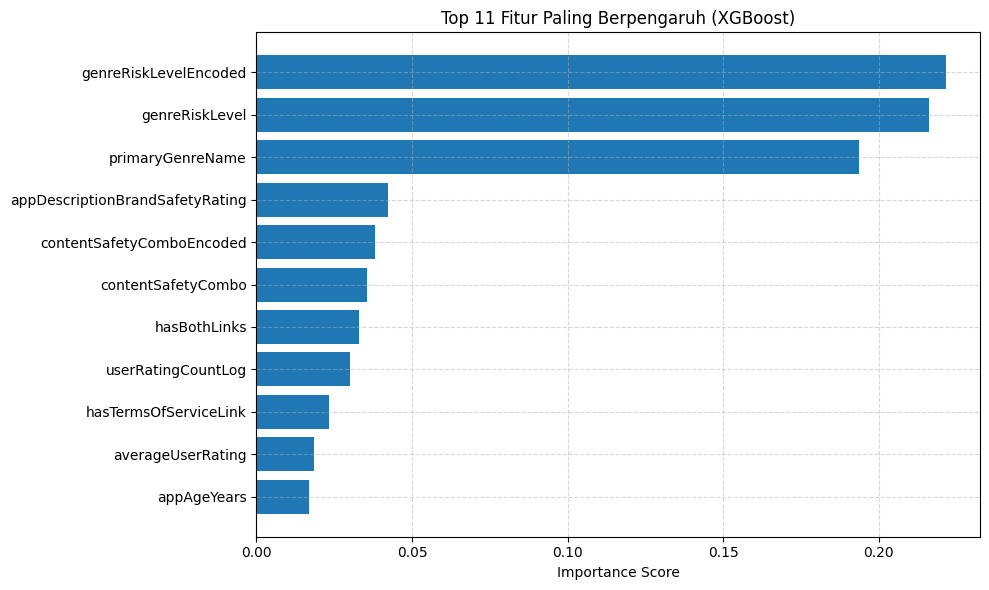

Top 11 fitur penting: ['genreRiskLevelEncoded', 'genreRiskLevel', 'primaryGenreName', 'appDescriptionBrandSafetyRating', 'contentSafetyComboEncoded', 'contentSafetyCombo', 'hasBothLinks', 'userRatingCountLog', 'hasTermsOfServiceLink', 'averageUserRating', 'appAgeYears']


In [32]:
from xgboost import plot_importance
import matplotlib.pyplot as plt
# 2. Ambil dan urutkan feature importance
importance_df = pd.DataFrame({
    'fitur': X_train.columns,
    'importance': xgb.feature_importances_
}).sort_values(by='importance', ascending=False)

# 3. Ambil top 11 fitur penting
top_11_features = importance_df.head(11)

# 4. Visualisasi
plt.figure(figsize=(10, 6))
plt.barh(top_11_features['fitur'][::-1], top_11_features['importance'][::-1])
plt.xlabel('Importance Score')
plt.title('Top 11 Fitur Paling Berpengaruh (XGBoost)')
plt.grid(True, linestyle='--', alpha=0.5)
plt.tight_layout()
plt.show()

# 5. Simpan nama-nama kolom penting ke list
top_11_feature_names = top_11_features['fitur'].tolist()

# Cetak list-nya
print("Top 11 fitur penting:", top_11_feature_names)

##TESTING TO TEST AND SUBMITION

In [22]:
# Ganti '5 - 1' dan '1 - 1' dengan '1 - 5'
dftest['downloads'] = dftest['downloads'].replace({
    '5 - 1': '1 - 5',
    '1 - 1': '1 - 5',
    '10 - 1': '5 - 10'
})

In [23]:
# Ganti nilai-nilai noise dengan 'UNKNOWN'
dftest['developerCountry'] = dftest['developerCountry'].replace({
    'ADDRESS NOT LISTED IN PLAYSTORE': 'UNKNOWN',
    'CANNOT IDENTIFY COUNTRY': 'UNKNOWN',
    'PERSONAL DATA, CAN NOT BE PUBLICLY DISCLOSED ACCORDING TO APPLICABLE LAWS.': 'UNKNOWN',
    'STATUTORY MASKING ENABLED': 'UNKNOWN'
})

# Sesuaikan format negara yang terlalu panjang atau tidak konsisten
dftest['developerCountry'] = dftest['developerCountry'].replace({
    'TAIWAN, PROVINCE OF CHINA': 'TAIWAN'
})

# Gabungkan negara dengan count <= 5 menjadi 'RARE' atau 'OTHERS'
rare_countries = dftest['developerCountry'].value_counts()[dftest['developerCountry'].value_counts() <= 5].index
dftest['developerCountry'] = dftest['developerCountry'].replace(rare_countries, 'RARE')

In [24]:
dftest = handle_missing_values(dftest)
dftest = feature_engineering(dftest)
# Konversi ke string dulu
for col in label_cols:
    dftest[col] = dftest[col].astype(str)

# Lalu encoding
le = LabelEncoder()
for col in label_cols:
    dftest[col] = le.fit_transform(dftest[col])

<ipython-input-15-36ed7d011028>:8: FutureWarning: Downcasting object dtype arrays on .fillna, .ffill, .bfill is deprecated and will change in a future version. Call result.infer_objects(copy=False) instead. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  df['hasPrivacyLink'] = df['hasPrivacyLink'].fillna(False).astype(bool)
<ipython-input-15-36ed7d011028>:9: FutureWarning: Downcasting object dtype arrays on .fillna, .ffill, .bfill is deprecated and will change in a future version. Call result.infer_objects(copy=False) instead. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  df['hasTermsOfServiceLink'] = df['hasTermsOfServiceLink'].fillna(False).astype(bool)


In [25]:
print("\n======MISSING VALUES=====")
print(dftest.isnull().sum())
print("\n======DUPLICATE DATA=====")
print(dftest.duplicated().sum())


======MISSING VALUES=====
ID                                 0
developerCountry                   0
countryCode                        0
userRatingCount                    0
primaryGenreName                   0
downloads                          0
deviceType                         0
hasPrivacyLink                     0
hasTermsOfServiceLink              0
hasTermsOfServiceLinkRating        0
isCorporateEmailScore              0
adSpent                            0
appAge                             0
averageUserRating                  0
appContentBrandSafetyRating        0
appDescriptionBrandSafetyRating    0
mfaRating                          0
userRatingCountLog                 0
adSpentLog                         0
appAgeYears                        0
hasBothLinks                       0
missingLegalLinks                  0
isDeveloperCountryUnknown          0
isTargetingGlobal                  0
genreRiskLevel                     0
genreRiskLevelEncoded              0
isForKidsDe

In [26]:
dftest

ID  developerCountry  countryCode  userRatingCount  primaryGenreName  \
0     2807                31           30                2                22   
1     1742                 9           24                0                15   
2      806                30           70            13059                15   
3     2635                31           30                0                15   
4     9047                31           30                0                34   
5     3048                31           30                0                26   
6     4691                12           30               32                10   
7     1346                30           53             4168                11   
8     7045                31           30                0                22   
9      958                14           29             2926                15   
10     331                31           47             4080                17   
11    1680                10           25             5186                15   
12    7086                31           30                0                23   
13    1699                17           35             8609                15   
14    8360                31           30                0                24   
15    5846                31           30                0                 5   
16    8630                31           30                0                 0   
17    8723                31           30               12                10   
18    6489                30           30              115                 5   
19    8746                 8           30           125255                15   
20    7155                31           30             1525                34   
21    1253                31           53            25517                11   
22    8529                31           30               35                10   
23    2154                10           30                3                32   
24    1643                30           84            12069                15   
25    1543                20           19            12142                15   
26    2560                13           30                0                17   
27    3083                18           30                6                23   
28    1631                10           30             1451                35   
29    4456                31           30                0                39   
30    8915                31           30                1                15   
31    3411                31           30                0                34   
32    1062                32           10             1742                15   
33    6219                31           30                6                34   
34    3621                 2           30                0                34   
35    3874                31           30                5                 7   
36    5246                31           30               11                39   
37    8130                31           30               60                 4   
38    8776                31           30                0                10   
39    7012                31           30           208613                11   
40    5252                19           30                8                15   
41    2577                31           30                0                15   
42    1138                31           29            25205                15   
43    4404                31           30                6                10   
44    6996                31           30               29                31   
45    3530                31           30                0                15   
46    9679                21           30                0                15   
47    6482                19           30                5                 5   
48      74                31           30               58                26   
49    71

In [27]:
prediction = xgb.predict_proba(dftest[feature_cols])[:, 1]

In [28]:
prediction

array([0.06732043, 0.54749936, 0.66793066, ..., 0.07694744, 0.06085591,
       0.11884176], dtype=float32)

In [ ]:
prediction

array([0.14500016, 0.60012066, 0.67413396, ..., 0.11351407, 0.08524045,
       0.1365023 ], dtype=float32)

In [31]:
df_predictions['coppaRisk'].value_counts()

coppaRisk
0.509772    18
0.026561    14
0.517903    14
0.440000    12
0.056871    12
0.536533    10
0.057338     9
0.434910     8
0.026337     8
0.026747     8
0.049510     8
0.026774     8
0.062015     7
0.058635     7
0.054416     7
0.062522     7
0.190322     7
0.535259     7
0.056996     7
0.029381     6
0.028386     6
0.077765     6
0.071414     6
0.026658     6
0.506654     6
0.071992     6
0.511726     6
0.029134     5
0.747592     5
0.076457     5
0.510329     5
0.510938     5
0.655241     5
0.071569     5
0.069108     5
0.510831     5
0.036624     5
0.752049     5
0.043736     5
0.026522     4
0.054864     4
0.671082     4
0.034457     4
0.434759     4
0.599404     4
0.023921     4
0.027508     4
0.026621     4
0.027414     4
0.058121     4
0.036833     4
0.065822     4
0.073595     4
0.026719     4
0.655768     4
0.435952     4
0.504332     4
0.049849     4
0.181675     4
0.659970     4
0.098034     3
0.642492     3
0.090900     3
0.023450     3
0.072589     3
0.029450     3
0.073005     3
0.057822     3
0.081751     3
0.034539     3
0.026592     3
0.227995     3
0.062702     3
0.433405     3
0.647731     3
0.034402     3
0.052955     3
0.038280     3
0.051232     3
0.498517     3
0.100867     3
0.055125     3
0.180387     3
0.748032     3
0.507163     3
0.090173     3
0.028357     3
0.072016     3
0.073006     3
0.090766     3
0.032053     3
0.596141     3
0.598590     3
0.052268     3
0.036232     3
0.058222     3
0.432806     3
0.027451     3
0.077846     3
0.053054     3
0.017646     3
0.034164     3
0.074044     3
0.089202     3
0.095541     3
0.029249     3
0.074406     3
0.049850     3
0.057465     3
0.182022     3
0.057495     3
0.058400     2
0.798969     2
0.017920     2
0.061110     2
0.500471     2
0.026830     2
0.063471     2
0.090765     2
0.637514     2
0.525320     2
0.073235     2
0.027295     2
0.109089     2
0.198340     2
0.540571     2
0.052400     2
0.095045     2
0.525473     2
0.026448     2
0.047089     2
0.028027     2
0.098804     2
0.073521     2
0.647768     2
0.663328     2
0.058909     2
0.037142     2
0.037656     2
0.309719     2
0.052924     2
0.371931     2
0.024709     2
0.617500     2
0.050234     2
0.507720     2
0.058576     2
0.506022     2
0.056761     2
0.090185     2
0.029220     2
0.023880     2
0.028828     2
0.737233     2
0.089084     2
0.070176     2
0.078390     2
0.108013     2
0.524042     2
0.065201     2
0.583083     2
0.027376     2
0.039092     2
0.048185     2
0.458492     2
0.041595     2
0.659967     2
0.613572     2
0.514966     2
0.587565     2
0.060954     2
0.090838     2
0.058158     2
0.537956     2
0.064481     2
0.543099     2
0.024106     2
0.026441     2
0.068366     2
0.431978     2
0.595941     2
0.635043     2
0.595110     2
0.091001     2
0.072544     2
0.198726     2
0.035162     2
0.467363     2
0.604732     2
0.044856     2
0.074540     2
0.037288     2
0.049567     2
0.031332     2
0.507504     2
0.604222     2
0.095027     2
0.027101     2
0.062568     2
0.024144     2
0.569038     2
0.675659     2
0.023930     2
0.654619     2
0.026397     2
0.037754     2
0.520529     2
0.522041     2
0.041480     2
0.061453     2
0.089249     2
0.071676     2
0.034023     2
0.587972     2
0.071860     2
0.091956     2
0.313445     2
0.090275     2
0.592658     2
0.536919     2
0.026748     2
0.588356     2
0.432129     2
0.026891     2
0.030552     2
0.059316     2
0.074172     2
0.028580     2
0.037765     2
0.090377     2
0.457221     2
0.093919     2
0.026822     2
0.520258     2
0.027109     2
0.024000     2
0.741999     2
0.027002     2
0.504141     2
0.081589     2
0.404010     2
0.506942     2
0.047521     2
0.049103     2
0.533223     2
0.077198     2
0.199378     2
0.060856     2
0.018140     2
0.182746     2
0.746330     2
0.026697     2
0.752046     2
0.024009     2
0.066393     2
0.048389     2
0.182902     2
0.027575     2
0.036484     2
0.026522     2
0.023822     2
0.023199     2
0.062699     2
0.090052     2
0.036077     2
0.018533     2


In [30]:
df_predictions = pd.DataFrame({
    'ID': dftest['ID'],
    'coppaRisk': prediction
})

# Menyimpan hasil prediksi ke file CSV
df_predictions.to_csv('predictions.csv', index=False)